---
# title: "My Notebook"
format:
  html:
    toc: true           # ✅ Table of contents (outline)
    toc-location: left  # ✅ Place TOC in the left sidebar
    number-sections: true
    code-fold: true
    code-summary: "Show Code"
    theme: cosmo        # Optional themes: cosmo, flatly, default, etc.
---

# Week 9A<br>Getting Data, Part 2: Working with APIs


**Week #7 Agenda**

- Introduction to APIs
- Natural language processing via Philly's 311 API
    - Word frequencies
    - Sentiment analysis
- Pulling census data and shape files using Python

::: {.callout-important}

Update your local environment!

- Small update to the course's Python environment
- Update the environment on your laptop using [these instructions](https://musa-550-fall-2023.github.io/resource/mamba.html#updating-an-existing-environment) on course website

:::

In [30]:
# !pip install holoviews
# !pip install hvplot
# !pip install seaborn

In [31]:
import geopandas as gpd
import holoviews as hv
import hvplot.pandas
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [32]:
# Show all columns
pd.options.display.max_columns = 999

## Part 1: Introduction to APIs

Or, how to pull data from the web using Python

**Application programming interface (API):**

> (noun): A particular set of rules and specifications that software programs can follow to communicate with each other and exchange data.

**Example APIs**

- Socrata Open Data: [https://dev.socrata.com/](https://dev.socrata.com/)
- Open Data Philly: [https://opendataphilly.org](https://opendataphilly.org)
- US Census Bureau: [https://www.census.gov/data/developers/data-sets.html](https://www.census.gov/data/developers/data-sets.html)
- Bureau of Labor Statistics: [https://www.bls.gov/developers/](https://www.bls.gov/developers/)
- US Geological Survey: [https://www.usgs.gov/products/data-and-tools/apis](https://www.usgs.gov/products/data-and-tools/apis)
- US Environmental Protection Agency: [https://www.epa.gov/enviro/web-services](https://www.epa.gov/enviro/web-services)
- Google APIs: [https://console.cloud.google.com/apis/library](https://console.cloud.google.com/apis/library)
- Facebook: [https://developers.facebook.com/docs/apis-and-sdks/](https://developers.facebook.com/docs/apis-and-sdks/)
- Twitter: [https://developer.twitter.com/en/docs/api-reference-index.html](https://developer.twitter.com/en/docs/api-reference-index) (RIP 💀)
- Foursquare: [https://developer.foursquare.com/](https://developer.foursquare.com/)
- Instagram: [https://www.instagram.com/developer/](https://www.instagram.com/developer/)
- Yelp: [https://www.yelp.com/developers](https://www.instagram.com/developer/)

::: {.callout-note}

When accessing data via API, many services will require you to register an API key to prevent you from overloading the service with requests.

:::

###  Example #1: Automated data feeds

The simplest form of API is when data providers maintain data files via a URL that are automatically updated with new data over time. 

#### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes, and data is provided in GeoJSON format over the web. 

The API has a separate endpoint for each version of the data that users might want. No authentication is required.

API documentation:

[http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php](http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php)

Sample API endpoint, for magnitude 4.5+ earthquakes in past day:

[http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson](http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson)

GeoPandas can read GeoJSON files from the web directly. Simply pass the URL to the `gpd.read_file()` function:

In [33]:
# Download data on magnitude 2.5+ quakes from the past week
endpoint_url = (
    "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
)
earthquakes = gpd.read_file(endpoint_url)

In [34]:
earthquakes.head()

,id,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,alert,status,tsunami,sig,net,code,ids,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,us6000qys8,4.40,"159 km SSW of Hihifo, Tonga",1754536150895,1754537779040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,None,reviewed,0,298,us,6000qys8,",us6000qys8,",",us,",",origin,phase-data,",31.0,4.1930,0.90,90.0,mb,earthquake,"M 4.4 - 159 km SSW of Hihifo, Tonga",POINT Z (-174.42110 -17.26250 163.49100)
1,pr71491858,3.25,"59 km ESE of Punta Cana, Dominican Republic",1754534626070,1754535661440,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,None,reviewed,0,162,pr,71491858,",pr71491858,",",pr,",",origin,phase-data,",11.0,0.6998,0.48,166.0,md,earthquake,"M 3.3 - 59 km ESE of Punta Cana, Dominican Rep...",POINT Z (-67.84850 18.47550 7.24000)
2,us6000qys2,5.30,West Chile Rise,1754532765176,1754533931040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,None,reviewed,0,432,us,6000qys2,",us6000qys2,",",us,",",origin,phase-data,",43.0,10.0980,1.19,138.0,mb,earthquake,M 5.3 - West Chile Rise,POINT Z (-83.88380 -41.84290 10.00000)
3,us6000qyrr,4.70,"220 km SE of Petropavlovsk-Kamchatsky, Russia",1754527874408,1754529752040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,None,reviewed,0,340,us,6000qyrr,",us6000qyrr,",",us,",",origin,phase-data,",49.0,1.9480,0.66,128.0,mb,earthquake,"M 4.7 - 220 km SE of Petropavlovsk-Kamchatsky,...",POINT Z (160.81000 51.59860 10.00000)
4,us6000qyrp,4.50,"164 km ESE of Petropavlovsk-Kamchatsky, Russia",1754527741225,1754529301040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,None,reviewed,0,312,us,6000qyrp,",us6000qyrp,",",us,",",origin,phase-data,",37.0,1.4580,0.78,116.0,mb,earthquake,M 4.5 - 164 km ESE of Petropavlovsk-Kamchatsky...,POINT Z (160.92290 52.55490 10.00000)


Let's explore the data interactively with Folium:

In [35]:
# !pip install folium matplotlib mapclassify
# !pip install folium

In [36]:
from mapclassify import classify

In [40]:
# earthquakes.explore()

# earthquakes.plot()

Lots of other automated feeds available, updated every minute:


![](imgs/usgs-1.png){width=312}
![](imgs/usgs-2.png){width=300}


### Example #2: The CARTO API

- Philadelphia hosts the majority of its open data on OpenDataPhilly in the cloud using CARTO
- They provide an API to download the data
- You can access the API documentation on the dataset page on OpenDataPhilly

For example: shooting victims in Philadelphia

[https://www.opendataphilly.org/dataset/shooting-victims](https://www.opendataphilly.org/dataset/shooting-victims)

and the API documentation:

[https://cityofphiladelphia.github.io/carto-api-explorer/#shootings](https://cityofphiladelphia.github.io/carto-api-explorer/#shootings)

Let's take a look at the download URL for the data in the GeoJSON format:

![](imgs/shooting-victims-api.png){width=500}


#### The anatomy of an API request

![](imgs/carto-api.png){width="900"}



- **Base URL**: shown in blue
- **?**: shown in purple; it separates the base URL from the query parameters
- **Query parameters**: underlined in red; these parameters allow the user to customize the data response
- **&**: underlined in green; the separator between the query parameters

So, let's break down the URL into its component parts:

In [41]:
# The API endpoint
carto_api_endpoint = "https://phl.carto.com/api/v2/sql"

# The query parameters
params = {
    "q": "SELECT * FROM shootings",
    "format": "geojson",
    "skipfields": "cartodb_id",
    # Note: we won't need the filename parameter, since we're not saving the data to a file
    # "filename": "shootings"
}

::: {.callout-note}
### Note: SQL Queries

The `q` parameter is a *SQL query*. It allows you to select a specific subset of data from the larger database.

CARTO API documentation: [https://carto.com/developers/sql-api/](https://carto.com/developers/sql-api/)

SQL documentation: [https://www.postgresql.org/docs/9.1/sql.html](https://www.postgresql.org/docs/9.1/sql.html)

**General Query Syntax**

`SELECT [field names] FROM [table name] WHERE [query]`
:::

#### Let's try it out in Python

We'll use Python's `requests` library to use a "get" request to query the API endpoint with our desired query. Similar to our web scraping requests!

In [42]:
import requests

Let's make the get request and pass the query parameters via the `params` keyword:

In [43]:
response = requests.get(carto_api_endpoint, params=params)

response

<Response [200]>

In [44]:
# Get the returned data in JSON format
# This is a dictionary
features = response.json()

In [46]:
type(features)

dict

In [47]:
# What are the keys?
list(features.keys())

['type', 'features']

In [48]:
features["type"]

'FeatureCollection'

In [49]:
# Let's look at the first feature
features["features"][0]

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-75.232057, 39.932664]},
 'properties': {'objectid': 1,
  'year': 2015,
  'dc_key': '201512064080.00000000',
  'code': '400',
  'date_': '2015-08-12T00:00:00Z',
  'time': '10:00:00',
  'race': 'B',
  'sex': 'M',
  'age': '48',
  'wound': 'Multiple',
  'officer_involved': 'N',
  'offender_injured': 'N',
  'offender_deceased': 'N',
  'location': '6000 BLOCK Regent St',
  'latino': 0,
  'point_x': -75.23205744,
  'point_y': 39.93266438,
  'dist': '12',
  'inside': 0,
  'outside': 1,
  'fatal': 0}}

Use the `GeoDataFrame.from_features()` function to create a GeoDataFrame.

In [50]:
shootings = gpd.GeoDataFrame.from_features(features, crs="EPSG:4326")


::: {.callout-important}
Don't forget to specify the CRS of the input data when using `GeoDataFrame.from_features()`.
:::

In [51]:
shootings.head()

,geometry,objectid,year,dc_key,code,date_,time,race,sex,age,wound,officer_involved,offender_injured,offender_deceased,location,latino,point_x,point_y,dist,inside,outside,fatal
0,POINT (-75.23206 39.93266),1,2015,201512064080.00000000,400,2015-08-12T00:00:00Z,10:00:00,B,M,48,Multiple,N,N,N,6000 BLOCK Regent St,0.0,-75.232057,39.932664,12,0.0,1.0,0.0
1,POINT (-75.23004 39.93236),2,2015,201512030511.00000000,400,2015-04-22T00:00:00Z,11:20:00,B,M,39,Multiple,N,N,N,2000 BLOCK S 60th St,0.0,-75.230036,39.932357,12,0.0,1.0,0.0
2,POINT (-75.22167 39.93636),3,2015,201512012408.00000000,3400,2015-02-17T00:00:00Z,19:00:00,B,M,43,foot,N,N,N,5500 BLOCK Greenway Ave,0.0,-75.221674,39.936357,12,0.0,1.0,0.0
3,POINT (-75.22292 39.93538),4,2015,201512002152.00000000,100,2015-01-10T00:00:00Z,00:34:00,B,M,24,Chest,N,N,N,1900 BLOCK S 56th St,0.0,-75.222921,39.935376,12,0.0,1.0,1.0
4,POINT (-75.22952 39.91840),5,2015,201512000146.00000000,400,2015-01-01T00:00:00Z,13:41:00,B,M,24,Head,N,N,N,6600 BLOCK Dicks Ave,0.0,-75.229520,39.918396,12,0.0,1.0,0.0


#### At-Home Exercise: Visualizing shootings data

**Step 1: Prep the data**

- Drop rows where the geometry is NaN
- Convert to a better CRS (e.g., 3857)
- Load city limits from Open Data Philly and trim to those only within city limits (some shootings have wrong coordinates, outside Philadelphia!)

In [52]:
# make sure we remove missing geometries
shootings = shootings.dropna(subset=["geometry"])

# convert to a better CRS
shootings = shootings.to_crs(epsg=3857)

In [53]:
city_limits = gpd.read_file(
    "https://opendata.arcgis.com/datasets/405ec3da942d4e20869d4e1449a2be48_0.geojson"
).to_crs(epsg=3857)

In [54]:
# Remove any shootings that are outside the city limits
shootings = gpd.sjoin(shootings, city_limits, predicate="within", how="inner").drop(
    columns=["index_right"]
)

**Step 2: Plot the points**

A quick plot with geopandas to show the shootings as points, and overlay Philadelphia ZIP codes.

In [55]:
# From Open Data Philly
zip_codes = gpd.read_file(
    "https://opendata.arcgis.com/datasets/b54ec5210cee41c3a884c9086f7af1be_0.geojson"
).to_crs(epsg=3857)

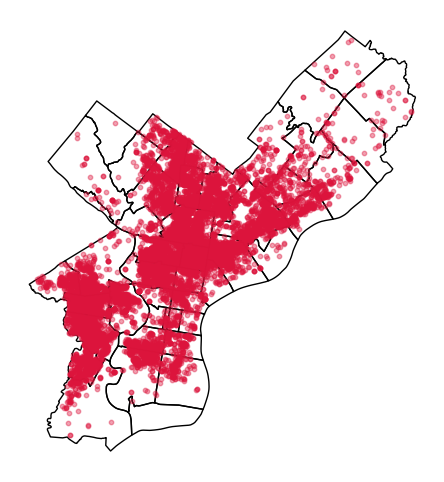

In [56]:
fig, ax = plt.subplots(figsize=(6, 6))

# ZIP Codes
zip_codes.to_crs(epsg=3857).plot(ax=ax, facecolor="none", edgecolor="black")

# Shootings
shootings.plot(ax=ax, color="crimson", markersize=10, alpha=0.4)
ax.set_axis_off()

**Step 3: Make a (more useful) hex bin map**

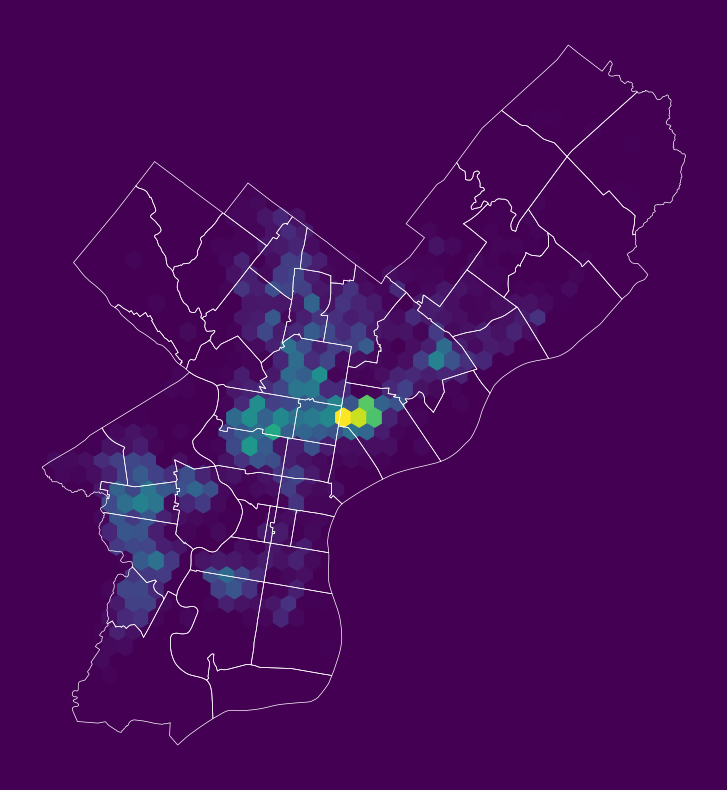

In [57]:
# Initialize the axes
fig, ax = plt.subplots(figsize=(10, 10), facecolor=plt.get_cmap("viridis")(0))

# Convert to Web Mercator and plot the hexbins
x = shootings.geometry.x
y = shootings.geometry.y
ax.hexbin(x, y, gridsize=40, mincnt=1, cmap="viridis")

# overlay the city limits
zip_codes.to_crs(epsg=3857).plot(
    ax=ax, facecolor="none", linewidth=0.5, edgecolor="white"
)

ax.set_axis_off()

#### Example: Count the total number of rows in a table

The SQL `COUNT` function can be applied to count all rows.

In [58]:
response = requests.get(
    carto_api_endpoint, params={"q": "SELECT COUNT(*) FROM shootings"}
)

In [59]:
response.json()

{'rows': [{'count': 17110}],
 'time': 0.005,
 'fields': {'count': {'type': 'number', 'pgtype': 'int8'}},
 'total_rows': 1}

::: {.callout-tip}
It's always a good idea to check how many rows you might be downloading before requesting all of the data from an API!
:::

#### Example: Select all columns, limiting the total number returned

The `LIMIT` function limits the number of returned rows. It is very useful for taking a quick look at the format of a database.

In [60]:
# Limit the returned data to only 1 row
query = "SELECT * FROM shootings LIMIT 1"

# Make the request
params = {"q": query, "format": "geojson"}
response = requests.get(carto_api_endpoint, params=params)

Create the GeoDataFrame:

In [61]:
df = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

df

,geometry,cartodb_id,objectid,year,dc_key,code,date_,time,race,sex,age,wound,officer_involved,offender_injured,offender_deceased,location,latino,point_x,point_y,dist,inside,outside,fatal
0,POINT (-75.23206 39.93266),1,1,2015,201512064080.00000000,400,2015-08-12T00:00:00Z,10:00:00,B,M,48,Multiple,N,N,N,6000 BLOCK Regent St,0,-75.232057,39.932664,12,0,1,0


#### Example: Select by specific column values

Use the `WHERE` function to select a subset where the logical condition is true.

Example #1: Select nonfatal shootings only

In [62]:
# Select nonfatal shootings only
query = "SELECT * FROM shootings WHERE fatal = 0"

In [63]:
# Make the request
params = {"q": query, "format": "geojson"}
response = requests.get(carto_api_endpoint, params=params)

# Make the GeoDataFrame
nonfatal = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

# Print
print("number of nonfatal shootings = ", len(nonfatal))

number of nonfatal shootings =  13416


Example #2: Select shootings in 2023

In [64]:
# Select based on "date_"
query = "SELECT * FROM shootings WHERE date_ >= '1/1/23'"

In [65]:
# Make the request
params = {"q": query, "format": "geojson"}
response = requests.get(carto_api_endpoint, params=params)

# Make the GeoDataFrame
shootings_2023 = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

# Print
print("number of shootings in 2023 = ", len(shootings_2023))

number of shootings in 2023 =  3419


#### At-Home Exercise: Explore trends by month and day of week

##### Step 1: Convert the date column to `DateTime` objects

Add Month and Day of Week columns

In [66]:
# Condddvert the data column to a datetime object
shootings["date"] = pd.to_datetime(shootings["date_"])

In [67]:
# Add new columns: Month and Day of Week
shootings["Month"] = shootings["date"].dt.month
shootings["Day of Week"] = shootings["date"].dt.dayofweek  # Monday is 0, Sunday is 6

##### Step 2: Calculate number of shootings by month and day of week

Use the familiar Groupby --> size()

In [68]:
count = shootings.groupby(["Month", "Day of Week"]).size()
count = count.reset_index(name="Count")
count.head()

,Month,Day of Week,Count
0,1,0,198
1,1,1,169
2,1,2,161
3,1,3,168
4,1,4,164


##### Step 3: Make a heatmap using `hvplot`

In [69]:
# Remember 0 is Monday and 6 is Sunday
count.hvplot.heatmap(
    x="Day of Week",
    y="Month",
    C="Count",
    cmap="viridis",
    width=400,
    height=500,
    flip_yaxis=True,
)

:HeatMap   [Day of Week,Month]   (Count)

**Trends:** more shootings on the weekends and in the summer months

### Example #3: GeoServices

A GeoService is a standardized format for returning GeoJSON files over the web

Originally developed by Esri, in 2010 the specification was transferred to the Open Web Foundation.

Documentation: [http://geoservices.github.io/](http://geoservices.github.io/)

#### Example: Philadelphia neighborhoods

OpenDataPhilly provides GeoService API endpoints for the geometry hosted on its platform

[https://opendataphilly.org/datasets/philadelphia-neighborhoods/](https://opendataphilly.org/datasets/philadelphia-neighborhoods/)

In [70]:
# The base URL for the neighborhoods layer
neighborhood_url = "https://services1.arcgis.com/a6oRSxEw6eIY5Zfb/arcgis/rest/services/Philadelphia_Neighborhoods/FeatureServer/0"

![](imgs/geoservices-1.png){width="800"}

Source: [https://geoservices.github.io/resources.html](https://geoservices.github.io/resources.html)

#### The `query/` endpoint

Layers have a single endpoint for requesting features: the `/query` endpoint.


In [71]:
neighborhood_query_endpoint = neighborhood_url + "/query"

In [72]:
neighborhood_query_endpoint

'https://services1.arcgis.com/a6oRSxEw6eIY5Zfb/arcgis/rest/services/Philadelphia_Neighborhoods/FeatureServer/0/query'

#### The allowed parameters

The main request parameters are:

- `where`: A SQL-like string to select a subset of features; to get all data, use `1=1` (always True)
- `outFields`: The list of columns to return; to get all, use `*`
- `f`: The returned format; for GeoJSON, use "geojson"
- `outSR`: The desired output CRS

In [73]:
params = {
    "where": "1=1",  # Give me all rows
    "outFields": "*",  # All fields
    "f": "geojson",  # GeoJSON format
    "outSR": "4326",  # The desired output CRS
}

Make the request:

In [74]:
r = requests.get(neighborhood_query_endpoint, params=params)

Get the features and create the GeoDataFrame:

In [75]:
json = r.json()

features = json["features"]

In [76]:
hoods = gpd.GeoDataFrame.from_features(features, crs="EPSG:4326")

In [77]:
hoods

,geometry,FID,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape__Area,Shape__Length
0,"POLYGON ((-75.06773 40.00540, -75.06765 40.005...",1,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,7.066581e+06,11074.587308
1,"POLYGON ((-75.01560 40.09487, -75.01768 40.092...",2,BUSTLETON,Bustleton,Bustleton,48868.458365,1.812721e+07,19485.686530
2,"POLYGON ((-75.18848 40.07273, -75.18846 40.072...",3,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,3.950980e+06,7980.051802
3,"POLYGON ((-75.21221 40.08603, -75.21211 40.086...",4,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,1.265385e+07,22476.270236
4,"POLYGON ((-75.18479 40.02837, -75.18426 40.027...",5,EAST_FALLS,East Falls,East Falls,27400.776417,6.434879e+06,10907.970158
...,...,...,...,...,...,...,...,...
153,"POLYGON ((-75.18373 39.91351, -75.18194 39.913...",154,PACKER_PARK,Packer Park,Packer Park,21816.017948,4.584862e+06,8444.679631
154,"POLYGON ((-75.14654 39.93005, -75.14804 39.921...",155,PENNSPORT,Pennsport,Pennsport,11823.233108,1.026917e+06,4706.597865
155,"POLYGON ((-75.16986 39.92312, -75.17015 39.921...",156,NEWBOLD,Newbold,Newbold,10052.570885,9.281435e+05,3994.098029
156,"POLYGON ((-75.17630 39.92425, -75.17798 39.923...",157,WEST_PASSYUNK,West Passyunk,West Passyunk,10499.291848,1.027608e+06,4173.301421


Now let's select data just for East Falls and subset the returned columns:

In [78]:
params = {
    "where": "LISTNAME = 'East Falls'",
    "outFields": ["LISTNAME"],
    "f": "geojson",
    "outSR": "4326",
}

r = requests.get(neighborhood_query_endpoint, params=params)

In [79]:
east_falls = gpd.GeoDataFrame.from_features(r.json()["features"], crs="EPSG:4326")

east_falls

,geometry,LISTNAME
0,"POLYGON ((-75.18479 40.02837, -75.18426 40.027...",East Falls


## Part 2: Natural Language Processing and the 311 Request API

In part two, we'll pull data using the API for the Philly 311 system, available at: [https://iframe.publicstuff.com/#?client_id=242](https://iframe.publicstuff.com/#?client_id=242)

We saw this site previously when we talked about web scraping last week:

![](imgs/philly-311.png)

Let's take another look at the address where the site is pulling its data from:

`https://vc0.publicstuff.com/api/2.0/requests_list?client_id=242&device=iframe&limit=35&page=1`


This is just an **API request!** It's an example of a *non-public, internal* API, but we can reverse-engineer it to extract the data we want!

Break it down into it's component parts:

- **Base URL:** [https://vc0.publicstuff.com/api/2.0/requests_list](https://vc0.publicstuff.com/api/2.0/requests_list)
- **Query parameters:** client_id, device, limit, page

It looks likes "client_id" identifies data for the City of Philadelphia, which is definitely a required parameter. Otherwise, the other parameters seem optional, returning the requests on a certain device and viewing page.

Let's test it out. We'll grab 2 requests from the first page:

In [80]:
r = requests.get(
    "https://vc0.publicstuff.com/api/2.0/requests_list",
    params={"client_id": 242, "page": 1, "limit": 2},
)

json = r.json()

json

{'response': {'requests': [{'request': {'id': 17210010,
     'image_thumbnail': '',
     'title': 'Vacant Lot Clean Up',
     'description': 'Please for the love of God clean this bs up. My house has do many mice and flies because of this nonsense.',
     'status': 'submitted',
     'address': '615 Winton St, Philadelphia, PA 19148, USA',
     'location': '',
     'zipcode': None,
     'foreign_id': '17974428',
     'date_created': 1754538539,
     'count_comments': 0,
     'count_followers': 0,
     'count_supporters': 0,
     'lat': 39.9220356,
     'lon': -75.1574552,
     'user_follows': 0,
     'user_comments': 0,
     'user_request': 0,
     'rank': '1',
     'user': 'Gilmoregirl117'}},
   {'request': {'id': 17210006,
     'image_thumbnail': '',
     'title': 'Maintenance Complaint',
     'description': 'Front I and grass never  cut very tall',
     'status': 'submitted',
     'address': '1544 Stoney Ln, Philadelphia, PA 19115, USA',
     'location': '',
     'zipcode': None,
   

Now we need to understand the structure of the response. First, access the list of requests:

In [81]:
request_list = json["response"]["requests"]

request_list

[{'request': {'id': 17210010,
   'image_thumbnail': '',
   'title': 'Vacant Lot Clean Up',
   'description': 'Please for the love of God clean this bs up. My house has do many mice and flies because of this nonsense.',
   'status': 'submitted',
   'address': '615 Winton St, Philadelphia, PA 19148, USA',
   'location': '',
   'zipcode': None,
   'foreign_id': '17974428',
   'date_created': 1754538539,
   'count_comments': 0,
   'count_followers': 0,
   'count_supporters': 0,
   'lat': 39.9220356,
   'lon': -75.1574552,
   'user_follows': 0,
   'user_comments': 0,
   'user_request': 0,
   'rank': '1',
   'user': 'Gilmoregirl117'}},
 {'request': {'id': 17210006,
   'image_thumbnail': '',
   'title': 'Maintenance Complaint',
   'description': 'Front I and grass never  cut very tall',
   'status': 'submitted',
   'address': '1544 Stoney Ln, Philadelphia, PA 19115, USA',
   'location': '',
   'zipcode': None,
   'foreign_id': '17974427',
   'date_created': 1754537919,
   'count_comments': 0,

We need to extract out the "request" key of each list entry. Let's do that and create a DataFrame:

In [82]:
data = pd.DataFrame([r["request"] for r in request_list])

In [83]:
data.head()

,id,image_thumbnail,title,description,status,address,location,zipcode,foreign_id,date_created,count_comments,count_followers,count_supporters,lat,lon,user_follows,user_comments,user_request,rank,user
0,17210010,,Vacant Lot Clean Up,Please for the love of God clean this bs up. M...,submitted,"615 Winton St, Philadelphia, PA 19148, USA",,None,17974428,1754538539,0,0,0,39.922036,-75.157455,0,0,0,1,Gilmoregirl117
1,17210006,,Maintenance Complaint,Front I and grass never cut very tall,submitted,"1544 Stoney Ln, Philadelphia, PA 19115, USA",,None,17974427,1754537919,0,0,0,40.083740,-75.044382,0,0,0,1,KOZA


Success! But we want to build up a larger dataset...let's pull data for the first 3 pages of data. This will take a minute or two...

In [84]:
# Store the data we request
data = []

# Total number of pages
total_pages = 3

# Loop over each page
for page_num in range(1, total_pages + 1):
    # Print out the page number
    print(f"Getting data for page #{page_num}...")

    # Make the request
    r = requests.get(
        "https://vc0.publicstuff.com/api/2.0/requests_list",
        params={
            "client_id": 242,  # Unique identifier for Philadelphia
            "page": page_num,  # What page of data to pull
            "limit": 200,  # How many rows per page
        },
    )

    # Get the json
    d = r.json()

    # Add the new data to our list and save
    data = data + [r["request"] for r in d["response"]["requests"]]

# Create a dataframe
data = pd.DataFrame(data)

Getting data for page #1...
Getting data for page #2...
Getting data for page #3...


In [85]:
len(data)

600

In [86]:
data.head()

,id,image_thumbnail,title,description,status,address,location,zipcode,foreign_id,date_created,count_comments,count_followers,count_supporters,lat,lon,user_follows,user_comments,user_request,rank,user,primary_attachment
0,17210222,,Vacant Lot Clean Up,overgrown,submitted,"2222 Moore St, Philadelphia, PA 19145, USA",,None,17974478,1754566097,0,0,0,39.929688,-75.182719,0,0,0,1,,NaN
1,17210217,,Other,,submitted,"10943 Waldemire Dr, Philadelphia, PA 19154, USA",,None,17974475,1754565873,0,0,0,40.076298,-74.982679,0,0,0,1,,NaN
2,17210209,https://d17aqltn7cihbm.cloudfront.net/uploads/...,Pothole Repair,Whole in street,submitted,"1223 Morris St,Philadelphia, PA 19148","Philadelphia, Pennsylvania",19148,17974474,1754565680,0,0,0,39.928913,-75.165887,0,0,0,1,spfdeutch,"{'id': 5609758, 'extension': 'jpg', 'content_t..."
3,17210205,https://d17aqltn7cihbm.cloudfront.net/uploads/...,Illegal Dumping,undefined,submitted,"761 Sloan St, Philadelphia, PA 19104, USA",,None,17974473,1754565543,0,0,0,39.966908,-75.202294,0,0,0,1,unionhill,"{'id': 5609756, 'extension': 'jpg', 'content_t..."
4,17210194,https://d17aqltn7cihbm.cloudfront.net/uploads/...,Maintenance Complaint,Property is overgrown with grass and weeds,submitted,"7534 Tabor Ave, Philadelphia, PA 19111, USA",,None,17974470,1754564609,0,0,0,40.063343,-75.077113,0,0,0,1,mpa1213,"{'id': 5609750, 'extension': 'jpeg', 'content_..."


Let's focus on the "description" column. This is the narrative text that the user inputs when entering a 311 request, and it is an example of *semi-structured* data. For the rest of today, we'll focus on how to extract information from semi-structured data.

### Semi-structured data

Data that contains some elements that cannot be easily consumed by computers 

**Examples:** human-readable text, audio, images, etc

### Key challenges

- **Text mining**: analyzing blocks of text to extract the relevant pieces of information
- **Natural language processing (NLP)**: programming computers to process and analyze human languages
- **Sentiment analysis**: analyzing blocks of text to derive the attitude or emotional state of the person

::: {.callout-note}
Twitter is one of the main API examples of semi-structured data, but since Elon Musk overhauled the API access, it's become prohibitively expensive to access (RIP 💀)
:::

To get started, let's remove any requests where the description is missing:

In [87]:
data = data.dropna(subset=["description"])
data_final = data.loc[data["description"] != ""]

In [88]:
# Strip out spaces and convert to a list
descriptions = data_final["description"].str.strip().tolist()

descriptions[:10]

['overgrown',
 'Whole in street',
 'undefined',
 'Property is overgrown with grass and weeds',
 'Has been parked here for months, obviously living in it. Starting to see garbage on the street and sidewalk outside of it',
 'Blighted property. Vagrants are now back in the property after the city boarded it up with wood. The building is in disrepair. It is a quality of life concern because there are home owners and renters that live on the block. Please come out and boarder with a more permanent solution like cinderblocks and cement. Because these vandalizing vagrants who also need homelessness and drug abuse help have caused  major damage to the eye care business next door.',
 "They've been starting at 6:30am for months, the law is 7. It's incredibly frustrating",
 'Bailey 894 PSEO',
 'periodically both refuse and recycling has missed the pick up. the items are stored on the side of the building. they pull up the driveway and back out the same way and miss the items. if they go all they 

### Use case #1: calculating word frequencies

An example of **text mining**

#### Text mining and dealing with messy data

Some steps to clean up our text data:

1. Break strings into words
1. Remove capitalization
1. Remove stop words
1. Remove punctuation

**1. Break strings into words**

Use the `.split()` command to break a string into words by splitting on spaces.

In [89]:
example_string = "This is an Example"

example_string.split()

['This', 'is', 'an', 'Example']

In [90]:
descriptions_words = [desc.split() for desc in descriptions]

In [91]:
descriptions_words[0]

['overgrown']

This is a list of lists, e.g., the first element is a list of words. Let's *flatten* this into a list of just words:

In [92]:
descriptions_words_flat = []

for list_of_words in descriptions_words:
    for word in list_of_words:
        descriptions_words_flat.append(word)

In [93]:
descriptions_words_flat[0]

'overgrown'

In [94]:
len(descriptions_words_flat)

21921

**2. Convert all words to lower case**

Use `.lower()` makes all words lower cased

In [95]:
descriptions_words_lower = [word.lower() for word in descriptions_words_flat]

In [96]:
descriptions_words_lower[:10]

['overgrown',
 'whole',
 'in',
 'street',
 'undefined',
 'property',
 'is',
 'overgrown',
 'with',
 'grass']

In [97]:
len(descriptions_words_lower)

21921

**3. Remove stop words**

Common words that do not carry much significance and are often ignored in text analysis.

We can use the `nltk` package.

The "Natural Language Toolkit" https://www.nltk.org/

Import and download the stop words:

In [100]:
# !pip install nltk

In [101]:
import nltk

nltk.download("stopwords");

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jianglix/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Get the list of common stop words:

In [102]:
stop_words = list(set(nltk.corpus.stopwords.words("english")))

stop_words[:10]

['those',
 "we'd",
 'under',
 'further',
 "he'll",
 'with',
 "we'll",
 'why',
 "i'll",
 'at']

In [103]:
len(stop_words)

198

In [104]:
descriptions_no_stop = []

for word in descriptions_words_lower:
    if word not in stop_words:
        descriptions_no_stop.append(word)

In [105]:
descriptions_no_stop = [
    word for word in descriptions_words_lower if word not in stop_words
]

In [106]:
len(descriptions_no_stop)

14301

**4. Remove punctuation**

Get the list of common punctuation:

In [107]:
import string

In [108]:
punctuation = list(string.punctuation)

In [109]:
punctuation[:5]

['!', '"', '#', '$', '%']

Remove punctuation from words:

In [110]:
descriptions_final = []

# Loop over all words
for word in descriptions_no_stop:
    # Remove any punctuation from the words
    for p in punctuation:
        word = word.replace(p, "")

    # Save it if the string is not empty
    if word != "":
        descriptions_final.append(word)

Convert to a Dataframe with one column:

In [111]:
words = pd.DataFrame({"words": descriptions_final})

In [112]:
words.head()

,words
0,overgrown
1,whole
2,street
3,undefined
4,property


**Calculate the word frequencies** 

Use a pandas groupby and sort to put in descending order:

In [113]:
N = (
    words.groupby("words", as_index=False)
    .size()
    .sort_values("size", ascending=False, ignore_index=True)
)

The top 15 words by frequency:

In [114]:
top15 = N.head(15)

top15

,words,size
0,street,234
1,trash,220
2,please,215
3,people,190
4,especially,175
5,philadelphia,174
6,police,140
7,17th,140
8,3815,140
9,eagles,121


**Plot the frequencies**

Use `seaborn` to plot our DataFrame of word counts...

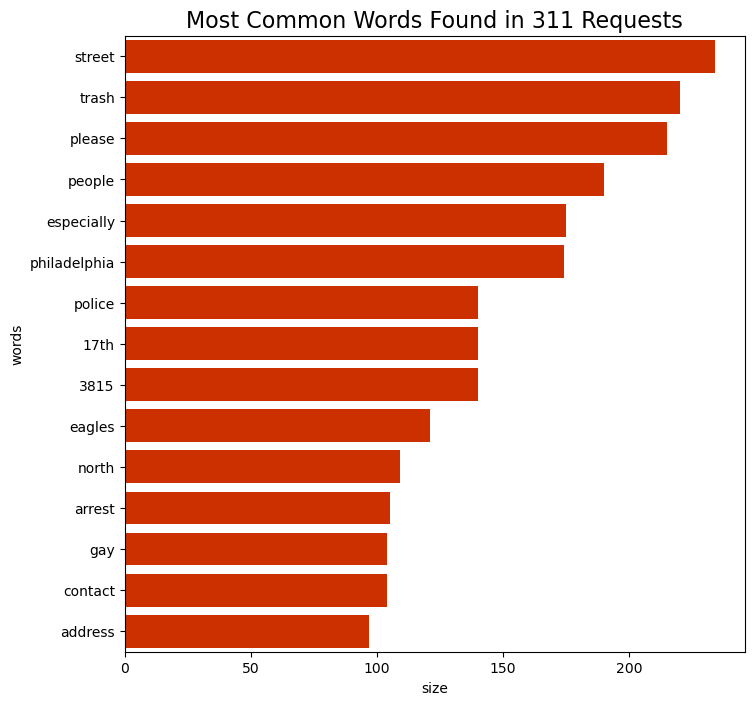

In [115]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
sns.barplot(
    y="words",
    x="size",
    data=top15,
    ax=ax,
    color="#cc3000",
    saturation=1.0,
)

ax.set_title("Most Common Words Found in 311 Requests", fontsize=16);

**Takeaway:** Philly cares about trash! They don't call it Filthadelphia for nothing...